In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# Lire les csv exportés de notre base de données (AirTable)
BASE_DIR = 'Resources/'

land = pd.read_csv(BASE_DIR + 'type de sol-Grid view.csv')
plant = pd.read_csv(BASE_DIR+ 'BasePlants-All projects.csv')
rain = pd.read_csv(BASE_DIR+ 'Précipitation2022-Grid view.csv')

##############
# DataFrames #
# ############
# plant
# land
# rain

In [5]:
plant

,Plantes,besoin en eau (m³/ha),Durée ( en jours ),Racine (m),Kc,ETRef (mm),besoin en eau annuel (m³/ha),Précision
0,Le blé,5500,270,1.50,0.90,4.0,NaN,NaN
1,La betterave sucrière,6500,60,0.35,0.80,4.0,NaN,NaN
2,Le tournesol,1000,130,2.00,0.60,4.0,2800.0,NaN
3,Le soja,6370,130,1.00,0.70,4.0,NaN,NaN
4,Le maïs,4000,180,0.45,0.80,4.0,8100.0,NaN
5,Le sorgho,4750,130,1.00,0.85,4.0,13330.0,NaN
6,Les Vignes,2150,335,3.00,0.55,4.0,NaN,Le sol le plus adapté à la vigne sera pierreux...


In [3]:
land

,Type de sol,RU (Réserve Utile d'eau),Notes
0,Argiles,1.85,Retiens de façon efficace l'eau / une terre du...
1,Limons,1.80,Intermédiarie entre argiles et sables
2,Sables,0.70,Séchent facilement donc les apports doivent êt...
3,Argiles - sableuses,1.65,NaN
4,Argiles - limoneux,1.95,NaN
5,Limons - sableux,1.25,NaN
6,Argiles - sablo - limoneux,1.70,NaN
7,NaN,NaN,"Plus le sol est sableux, plus l’infiltration e..."
8,NaN,NaN,"plus le sol est argileux, plus il retient l’eau"


In [72]:
rain

,Mois,Précipitations
0,1,39.6
1,2,48.9
2,3,34.4
3,4,62.4
4,5,19.1
5,6,99.8
6,7,3.0
7,8,26.3
8,9,39.4
9,10,6.4


In [106]:
##############
# Formulaire #
##############
# Tous les variables qui commencent par 'enter_' sont les données de formulaire par utilisateur

enter_plant = "Le maïs"
enter_land = "Argiles"
enter_nb_day=150
enter_surface = 15689 # m2

In [105]:
# Simulation - recherche la donnée
plant_searched = plant.loc[plant['Plantes'] == enter_plant]

In [7]:
plant_searched

,Plantes,besoin en eau (m³/ha),Durée ( en jours ),Racine (m),Kc,ETRef (mm),besoin en eau annuel (m³/ha),Précision
4,Le maïs,4000,180,0.45,0.8,4.0,8100.0,NaN


In [8]:
# Simulation - recherche la donnée
land_searched = land.loc[land['Type de sol'] == enter_land]

In [9]:
land_searched

,Type de sol,RU (Réserve Utile d'eau),Notes
0,Argiles,1.85,Retiens de façon efficace l'eau / une terre du...


In [10]:
rain_from_2010 = rain.loc[rain['Année']>=2010]

In [11]:
# Précipitations à Mérignac (2010 - 2022)
rain_from_2010

,Année,Précipitations
10,2010,762.8
11,2011,579.7
12,2012,814.3
13,2013,1027.5
14,2014,945.2
15,2015,559.4
16,2016,1040.0
17,2017,762.3
18,2018,763.1
19,2019,971.8


In [12]:
# Getteur plant, land objet par son nom
def get_plant(enter_plant):    
    return plant.loc[plant['Plantes'] == enter_plant]

def get_land(enter_land):
    return land.loc[land['Type de sol'] == enter_land]

In [103]:
# Getteur les attributs 'Plantes','Durée en jours','ru - réserve utile d'eau, 'pr - profondeur racine', 'besoin en eau' par Getteur plant, land objet
def get_duration(enter_plant):
    return get_plant(enter_plant)["Durée ( en jours )"]

def get_name(enter_plant):
    return get_plant(enter_plant)["Plantes"]    

def get_pr(enter_plant):
    return float(get_plant(enter_plant)["Racine (m)"])
    
def get_ru(enter_land):
    return float(get_land(enter_land)["RU (Réserve Utile d'eau)"])

def get_need_water(enter_plant):
    return float(get_plant(enter_plant)["besoin en eau"])

In [107]:
get_pr("Le maïs")

0.45

In [108]:
get_ru("Argiles")

1.85

In [109]:
# 1. Stockage d'eau (m -> mm)
def stock_water(ru, pr):
    return pr*(2/3)*ru*1000

# (/10000 : m2 -> h)
def volume_stock(stock_water,enter_surface):
    return stock_water*(enter_surface/10000)*10

In [116]:
corn_pr = get_pr("Le maïs")
argiles_ru = get_ru("Argiles")

stock = stock_water(corn_pr, argiles_ru)
current_volume = volume_stock(stock, enter_surface)

##########
# Result #
##########

print("stockage d'eau : " +str(stock) + " mm")
print("volume de stockage : " +str(current_volume) + " m3")

stockage d'eau : 555.0 mm
volume de stockage : 8707.395 m3


In [65]:
# 2. User saisit le nombre de jour lors de remplir le formulaire
def need_of_water(enter_nb_day, kc, etref):
    return float(enter_nb_day*kc*etref)

def get_kc(enter_plant):
    return float(get_plant(enter_plant)["Kc"])

def get_etref(enter_plant):
    return float(get_plant(enter_plant)["ETRef (mm)"])

In [111]:
kc = get_kc("Le maïs")
etref = get_etref("Le maïs")

water = need_of_water(enter_nb_day,kc,etref)
surface = enter_surface/10000 

##########
# Result #
##########

print(str(water) + " mm") 
# 1 mm = 10 m3/ha

480.0 mm


In [67]:
# 3. Volumne d'eau nécessaire

def volume_need_for_plant(water,enter_surface):
    
    return water*(enter_surface/10000)*10

In [112]:
needed_plant_volume = volume_need_for_plant(water, enter_surface)

##########
# Result #
##########

print(str(needed_plant_volume) + " m3")

7530.72 m3


In [113]:
# -- Comparaison -- (1) volume_stock , (3) volume_need_for_plant 
# (4) Checker pour l'irrigation si besoin

def check_irrigation_needed(current_volume,needed_plant_volume):
    if(current_volume < needed_plant_volume):
        return True
    else:
        return False

In [114]:
if check_irrigation_needed(current_volume,needed_plant_volume):
    print("Il faut arroser")
else:
    print("Pas besoin d'irriguer")

Pas besoin d'irriguer


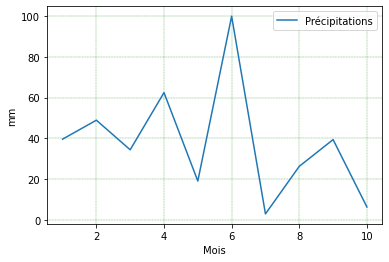

In [115]:
# (5) Précipitations mensuelles 2022

rain_graph = rain.plot(x="Mois", y=["Précipitations"])
rain_graph.set_ylabel("mm")
rain_graph.grid(color = 'green', linestyle = '--', linewidth = 0.3)

In [ ]:
# En moyen, "{get_name(enter_plant)}" consomme "{get_need_water(enter_plant)}" (m³/ha) 
# et dure "{get_duration(enter_plant)}" jour(s).